In [44]:
import glob
from PIL import Image
import numpy as np
import pandas as pd
from sklearn.utils import shuffle
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D,Dense,Flatten,MaxPooling2D,Dropout,BatchNormalization
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.utils import plot_model
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, confusion_matrix
import seaborn as sns

In [2]:
from google.colab import drive

drive.mount('/content/drive')

Mounted at /content/drive


In [62]:
no_smile = glob.glob("/content/drive/MyDrive/project_image/non_smile/*.jpg")
smile = glob.glob("/content/drive/MyDrive/project_image/smile/*.jpg")
test = glob.glob("/content/drive/MyDrive/project_image/test/*.jpg")

In [4]:
X=[]
y=[]
for i in no_smile:
    X_i = Image.open(i)
    X_i = np.array(X_i.resize((224,224)))/255
    X.append(X_i)
    y.append("no smile")
    
for i in smile:
    X_i = Image.open(i)
    X_i = np.array(X_i.resize((224,224)))/255
    X.append(X_i)
    y.append("smile")

In [5]:
X = np.array(X)
y = np.array(y)

X,y = shuffle(X,y,random_state=42)

In [6]:
le = LabelEncoder()
y = le.fit_transform(y)

In [7]:
print("{} \n{}".format(X.shape,y.shape))

(1000, 224, 224, 3) 
(1000,)


In [8]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=0)
print("{} \n{}".format(X_train.shape,X_test.shape))
print("{} \n{}".format(y_train.shape,y_test.shape))

(800, 224, 224, 3) 
(200, 224, 224, 3)
(800,) 
(200,)


In [9]:
callback = EarlyStopping(patience=60)

In [29]:
model = Sequential([Conv2D(128,(3,3),activation="relu",input_shape= X_train.shape[1:]),
                    MaxPooling2D((2,2)),
                    Dropout(0.3),
                    BatchNormalization(),
                    Conv2D(64,(3,3),activation="relu"),
                    MaxPooling2D((2,2)),
                    Conv2D(64,(3,3),activation="relu"),
                    Flatten(),
                    Dense(128,activation="relu"),
                    Dropout(0.3),
                    BatchNormalization(),
                    Dense(128,activation="relu"),
                    Dense(1,activation="sigmoid")])

In [30]:
model.compile(optimizer="adam",loss="binary_crossentropy",metrics=["accuracy"])

In [31]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 222, 222, 128)     3584      
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 111, 111, 128)    0         
 2D)                                                             
                                                                 
 dropout_2 (Dropout)         (None, 111, 111, 128)     0         
                                                                 
 batch_normalization_2 (Batc  (None, 111, 111, 128)    512       
 hNormalization)                                                 
                                                                 
 conv2d_4 (Conv2D)           (None, 109, 109, 64)      73792     
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 54, 54, 64)      

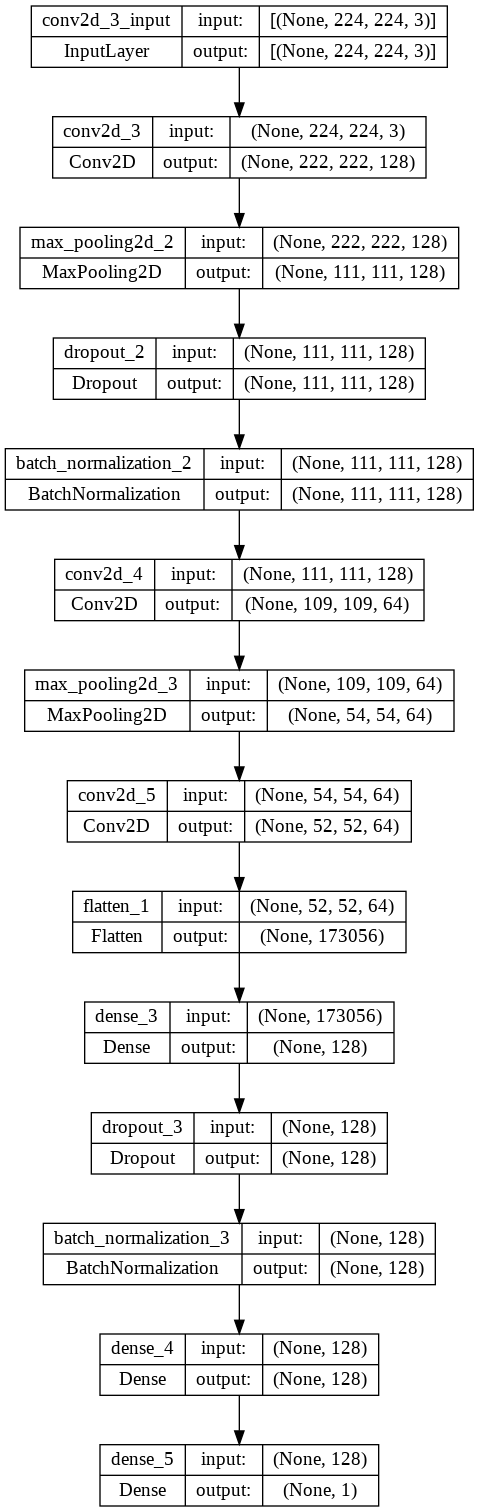

In [32]:
plot_model(model, to_file='model_shapes.png', show_shapes=True)

In [33]:
train_hist = model.fit(X_train,y_train,epochs=60,batch_size=8,callbacks=[callback],validation_split=0.1)

Epoch 1/60
90/90 [==============================] - 5s 44ms/step - loss: 0.6297 - accuracy: 0.6375 - val_loss: 0.8573 - val_accuracy: 0.4625
Epoch 2/60
90/90 [==============================] - 4s 42ms/step - loss: 0.5522 - accuracy: 0.7139 - val_loss: 1.2858 - val_accuracy: 0.4625
Epoch 3/60
90/90 [==============================] - 4s 42ms/step - loss: 0.4952 - accuracy: 0.7611 - val_loss: 0.4524 - val_accuracy: 0.7875
Epoch 4/60
90/90 [==============================] - 4s 42ms/step - loss: 0.4936 - accuracy: 0.7708 - val_loss: 0.5203 - val_accuracy: 0.6750
Epoch 5/60
90/90 [==============================] - 4s 42ms/step - loss: 0.4113 - accuracy: 0.8042 - val_loss: 0.7556 - val_accuracy: 0.6250
Epoch 6/60
90/90 [==============================] - 4s 43ms/step - loss: 0.4677 - accuracy: 0.7639 - val_loss: 0.5523 - val_accuracy: 0.7000
Epoch 7/60
90/90 [==============================] - 4s 43ms/step - loss: 0.4648 - accuracy: 0.7694 - val_loss: 0.6821 - val_accuracy: 0.6750
Epoch 8/60
90

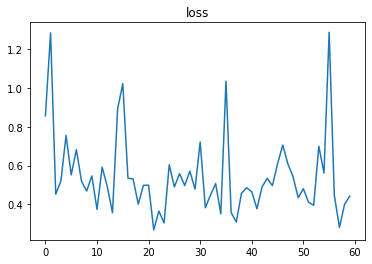

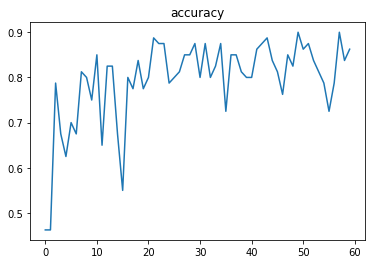

In [35]:
plt.plot(train_hist.history['val_loss'])
plt.title("loss")
plt.show()
plt.plot(train_hist.history['val_accuracy'])
plt.title("accuracy")
plt.show()

In [34]:
model.evaluate(X_test,y_test)

7/7 [==============================] - 0s 38ms/step - loss: 0.3917 - accuracy: 0.8550


[0.39165303111076355, 0.8550000190734863]

In [ ]:
test_data = []

for i in range(100):
    X_i = Image.open(test[i])
    X_i = np.array(X_i.resize((224,224)))/255
    test_data.append(X_i)

In [40]:
test_data = np.array(X_test)

y_pred = model.predict(X_test)
y_pred_logic = (y_pred > 0.5).astype(np.int)
y_pred_logic = y_pred_logic.reshape(-1,)
y_pred_logic

7/7 [==============================] - 0s 37ms/step


<ipython-input-40-ad0a5eb5c059>:4: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  y_pred_logic = (y_pred > 0.5).astype(np.int)


array([1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0,
       1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0,
       1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0,
       0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0,
       0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1,
       1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1,
       0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1,
       0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0,
       1, 0])

In [59]:
y_test

array([1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0,
       1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0,
       1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0,
       0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0,
       0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1,
       0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1,
       0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0,
       1, 1])

test acc: 0.855


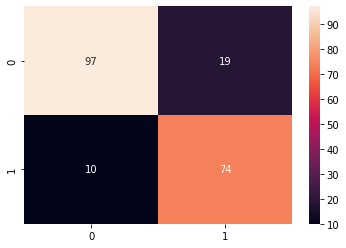

In [45]:
print ('test acc: %s' % accuracy_score(y_test, y_pred_logic))

cm = confusion_matrix(y_test, y_pred_logic)
sns.heatmap(cm, annot=True)

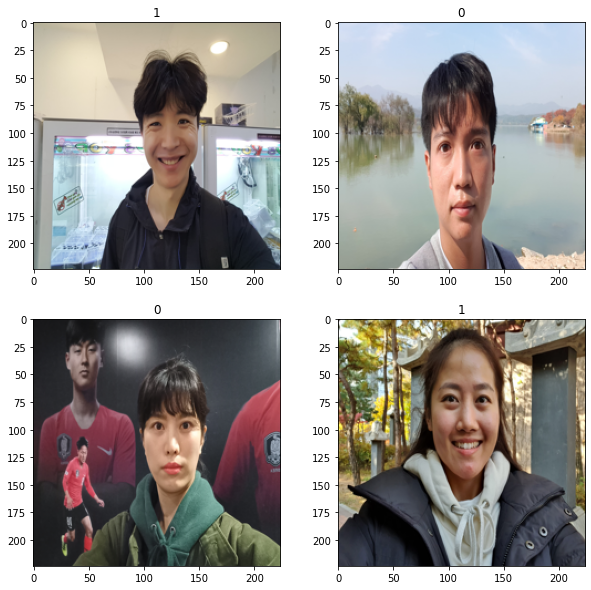

In [73]:
fig = plt.figure(figsize =(10,10))

plt.subplot(2, 2, 1)
plt.title(y_pred_logic[0])
plt.imshow(X_test[0])
plt.subplot(2, 2, 2)
plt.title(y_pred_logic[2])
plt.imshow(X_test[2])
plt.subplot(2, 2, 3)
plt.title(y_pred_logic[3])
plt.imshow(X_test[3])
plt.subplot(2, 2, 4)
plt.title(y_pred_logic[198])
plt.imshow(X_test[198])


In [64]:
test_data = []

for i in test:
    X_i = Image.open(i)
    X_i = np.array(X_i.resize((224,224)))/255
    test_data.append(X_i)

In [65]:
test_data = np.array(test_data)

In [66]:
y_pred2 = model.predict(test_data)
y_pred_logic2 = (y_pred2 > 0.5).astype(np.int)
y_pred_logic2 = y_pred_logic2.reshape(-1,)
y_pred_logic2

1/1 [==============================] - 0s 250ms/step


<ipython-input-66-a0e7546a15c2>:2: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  y_pred_logic2 = (y_pred2 > 0.5).astype(np.int)


array([1, 0, 1])

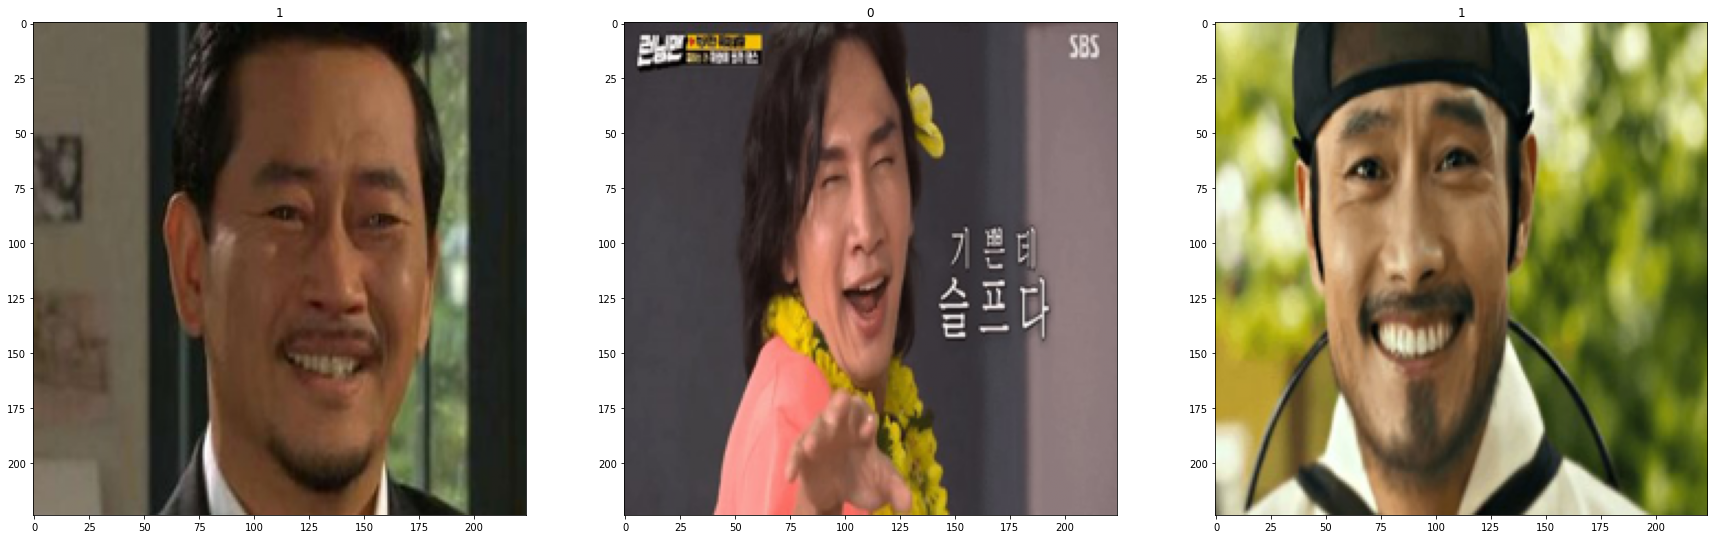

In [74]:
fig = plt.figure(figsize =(30,30))

plt.subplot(1, 3, 1)
plt.title(y_pred_logic2[0])
plt.imshow(test_data[0])
plt.subplot(1, 3, 2)
plt.title(y_pred_logic2[1])
plt.imshow(test_data[1])
plt.subplot(1, 3, 3)
plt.title(y_pred_logic2[2])
plt.imshow(test_data[2])
